# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Taiwan (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source data set: 
UCI Machine Learning Repository [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

Reference [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## 1. Import Dataset



In [ ]:
#import package
import pandas as pd
import numpy as np


In [ ]:
# Ini untuk upload data dari local ke google colab di section
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Real estate valuation data set.xlsx to Real estate valuation data set.xlsx
User uploaded file "Real estate valuation data set.xlsx" with length 32717 bytes


In [ ]:
df = pd.read_excel('/content/Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
#Check row and Column
df.shape

(414, 8)

In [ ]:
#Overwiew Stats Descriptive
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
#Drop Column no
df.drop('No', inplace = True, axis =1)

In [ ]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Simplify Column Name

In [ ]:
# Simplify Column Name
df.rename(columns={'X1 transaction date':'X1', 'X2 house age':'X2', 'X3 distance to the nearest MRT station':'X3',
                   'X4 number of convenience stores':'X4','X5 latitude':'X5','X6 longitude':'X6',
                   'Y house price of unit area':'Y'}, inplace=True)

In [ ]:
df

,X1,X2,X3,X4,X5,X6,Y
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


# 2. EDA

**2.1 Gambarkan keadaan dari harga rumah pada variable (house price of unit area)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**a. Gambaran bisa dijelasin menggunakan statistik deskriptif dari variable harga rumah tersebut**

In [ ]:
df.Y.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y, dtype: float64

Dari data harga rumah tersebut dapat diketahui bahwa :
 

*   Rata-rata harga rumah = 37.98
*   Harga rumah terendah  = 7.6
*   Harga rumah tertinggi = 117.5
*   Rata-rata harga rumah (37.98) dan nilai tengah 
harga rumah (38.45) tidak jauh berbeda, sehingga kemungkinan distribusi harga rumah tersebar secara normal


**b. Sebaran Harga Rumah**

Dicek menggunakan statistical plot, apa key takeaway/ insight yang bisa diambil? **Q1**

In [ ]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

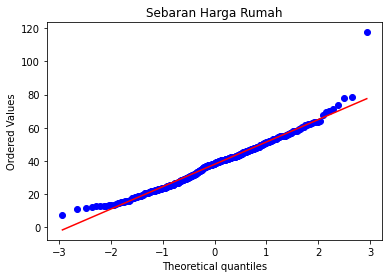

In [ ]:
stats.probplot(df['Y'], dist="norm", plot=py)
py.title('Sebaran Harga Rumah')
py.show()

# QQ-Plot

**Answer Q1:** Dari QQ-plot diatas, dapat dilihat bahwa sebaran titik Harga Rumah mendekati/menempel pada garis diagonal. Hal ini menunjukan bahwa data Harga Rumah (**Y**) terdistribusi normal sehingga memenuhi asumsi normalitas model regresi.

Data yang memenuhi asumsi normalitas pada saat digunakan untuk model tidak perlu melakukan regularisasi.

**c. Apakah ada outlier pada variabel harga rumah? Jika ada, nilainya berapa saja? Q2**

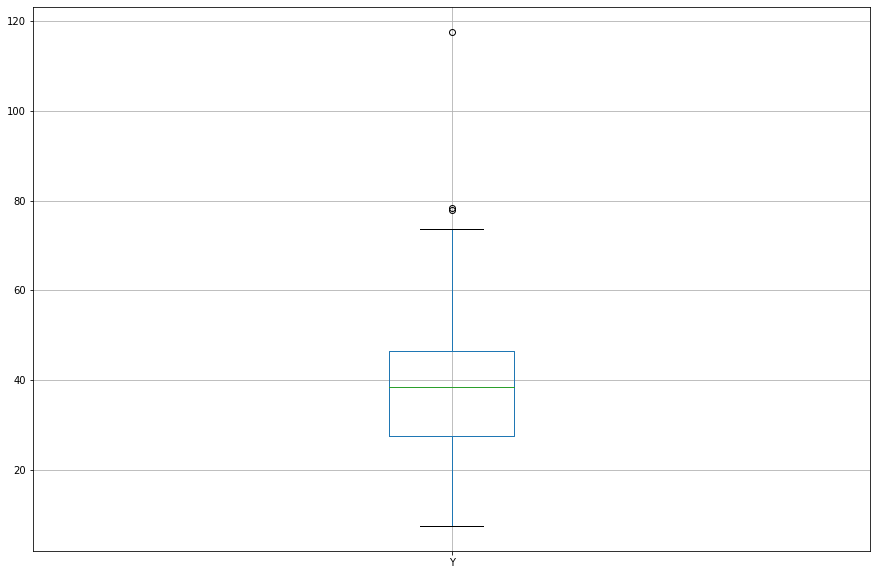

In [ ]:
df[['Y']].boxplot(figsize=(15,10))

**Answer Q2:** Dari Box Plot, dapat dilihat Outlier di upper pada data dikisaran nilai 79 dan data dikisaran nilai 119

**d. Variabel yang berkorelasi dengan harga rumah? Seberapa erat hubungannya?**

**Note: Korelasi >=0.5 baik + atau minus, ada hubungan erat antara variabel**
**Korelasi <0.5 baik + atau minus, tidak ada hubungan erat antar variabel**

In [ ]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Dari analisis korelasi diatas dapat diketahui bahwa : 

*   Jarak stasiun MRT (-0.67)
*   Banyaknya convinience store (0.57)
*   Letak lokasi (latitude) (0.54)
*   letak lokasi (longitude) (0.52)

mempengaruhi harga unit rumah

### Perbandingan Korelasi antara variabel

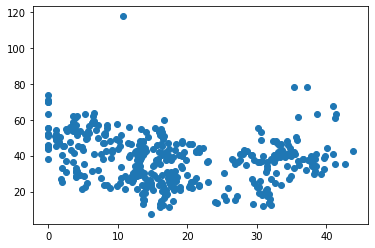

In [ ]:
# House Age vs House Price
plt.scatter(df['X2'],df['Y'])

**Apa yang bisa disimpulkan dari scatter plot ini? Q3**

**Answer Q3:** Dari Scatter Plot diatas, dapat dilihat bahwa tidak terdapat hubungan antara House Age / Usia Rumah dengan Harga Rumah

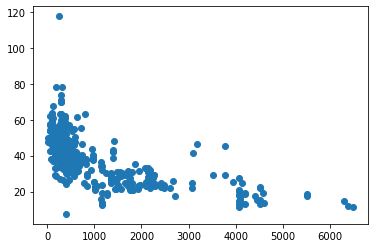

In [ ]:
# distance to nearest MRT Station vs House Price
plt.scatter(df['X3'], df['Y'])

**Apa yang bisa disimpulkan dari scatter plot ini? Q4**

**Answer Q4:** Dari Scatter Plot diatas, dapat disimpulkan bahwa terdapat hubungan negatif antara Jarak Rumah ke Stasiun MRT dengan Harga Rumah, dimana:

*   Semakin jauh Jarak Rumah-MRT maka Harga Rumah semakin murah
*   Semakin dekat Jarak Rumah-MRT maka Harga Rumah semakin tinggi



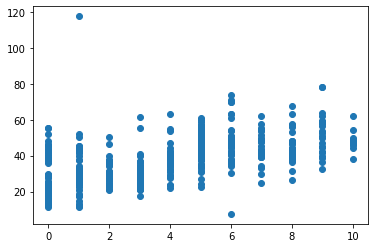

In [ ]:
# no. of Convenience Store vs House Price
plt.scatter(df['X4'], df['Y'])

**Answer:** Dari grafik diatas, dapat terlihat hubungan positif antara Jumlah Combini/Minimarket sekitar rumah dengan Harga Rumah. Semakin banyak jumlah combini, semakin tinggi Harga Rumah, begitupun sebaliknya.

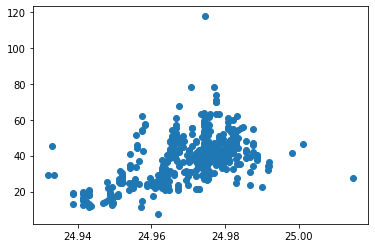

In [ ]:
# Latitude vs House Price
plt.scatter(df['X5'], df['Y'])

**Answer:** Dari grafik diatas, dapat terlihat hubungan positif antara Latitude Rumah dengan Harga Rumah

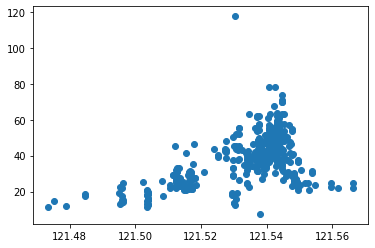

In [ ]:
# Longitude vs House Price
plt.scatter(df['X6'], df['Y'])

**Answer:** Dari grafik diatas, dapat terlihat hubungan positif antara Longitude Rumah dengan Harga Rumah

**Dari Perbandingan Korelasi diatas, maka dapat disimpulkan bahwa variable yang berkorelasi secara signifikan dengan Harga Rumah adalah:**


1. **Jarak Rumah-MRT (X3)**
2. **Jumlah Combini/Minimarket (X4)**
3. **Titik Latitude (X5)**
4. **Titik Longitude (X6)**





# 3. Pre-Processing

## Feature Engineering

**Cek Multikolinearitas**

Text(0.5, 1.0, 'Correlation matrix antara variable X')

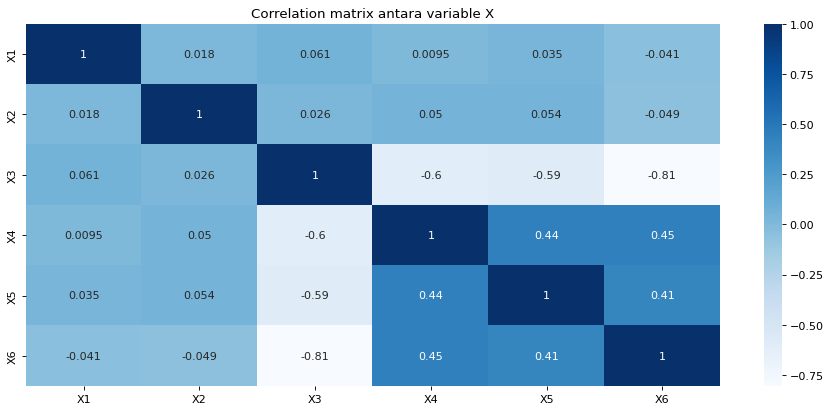

In [ ]:
fig,ax = plt.subplots(figsize=(14,6), dpi=80)
sns.heatmap(df.loc[:,'X1':'X6'].corr(),cmap="Blues", annot=True)
plt.title("Correlation matrix antara variable X")

**Ada multikolinearitas** antara variable X3 dan X6 (-0.81). Variable X6 (Longitude) tidak akan dimasukkan ke dalam model.

(Parameter Keputusan: dilihat dari koefisien korelasi antara 2 variabel X tersebut dengan variabel Y, mana koefisien relasi yang lebih tinggi dengan variabel Y, maka variabel itu yang akan dipertahankan.)

### Check Null Values and Type

In [ ]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

In [ ]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4      int64
X5    float64
X6    float64
Y     float64
dtype: object

# 4. Create Model and Evaluation

In [ ]:
X = df.loc[:,'X3':'X5']

In [ ]:
y = pd.DataFrame(df['Y'])

In [ ]:
X

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937
...,...,...,...
409,4082.01500,0,24.94155
410,90.45606,9,24.97433
411,390.96960,7,24.97923
412,104.81010,5,24.96674


In [ ]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


## Train and Test Split

In [ ]:
#membagi dataset menjadi data training dan data testing dengan proporsi 80 (train) 20 (test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [ ]:
np.set_printoptions(suppress=True)
print(X_train[:10])

[[ 0.86231113  0.00206208 -0.74851374]
 [-0.08646021 -1.36303292 -0.46755613]
 [-0.61545456  0.34333583 -0.93394575]
 [-0.28440414 -0.33921167  0.48047509]
 [-0.62516876  0.68460958  0.7237041 ]
 [-0.47474784  0.34333583 -0.51411482]
 [ 0.22219181 -1.36303292  1.30809591]
 [ 0.01978236  0.00206208  1.79535667]
 [ 0.22219181 -1.36303292  1.30809591]
 [ 0.80790465 -0.33921167 -0.51411482]]


In [ ]:
print(y_train[:10])

[[-1.00726424]
 [-1.12224369]
 [ 0.32218561]
 [-0.08742867]
 [ 0.94020014]
 [-0.03712516]
 [ 0.31499939]
 [-0.27427027]
 [ 0.04192321]
 [-0.51860159]]


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()
Lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
ypred = sc.inverse_transform(Lin_reg.predict((X_train)))

### MSE (Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_lin_reg = mean_squared_error(sc.inverse_transform(y_train),ypred).round(2)
print("MSE: %.2f" % mse_lin_reg)

MSE: 92.21


### MAE (Mean Absolute Error)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_lin_reg = mean_absolute_error(sc.inverse_transform(y_train),ypred).round(2)
print("MAE: %.2f" % mae_lin_reg)

MAE: 6.86


### R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_lin_reg = r2_score(sc.inverse_transform(y_train),ypred).round(2)
print("R2: %.2f" % r2_lin_reg)

R2: 0.52


**Kesimpulan Linear Regression:** Model regresi ini hanya dapat menjelaskan 52% Keragaman datanya dan tingkat/nilai error nya tinggi (MSE)

Note : Model regresi yang baik jika r2 > 75% dan MSE < 10%

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5, )
Ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [ ]:
ypred_RR = sc.inverse_transform(Ridge.predict((X_train)))
y_pred_tr_RR = pd.DataFrame(ypred_RR)
y_pred_tr_RR

,0
0,30.494338
1,33.185722
2,39.808279
3,40.103923
4,45.779157
...,...
326,31.919029
327,47.214433
328,40.111298
329,6.688738


### MSE

In [ ]:
from sklearn.metrics import mean_squared_error
mse_RR = mean_squared_error(sc.inverse_transform(y_train),ypred_RR).round(2)
print("MSE: %.2f" % mse_RR)

MSE: 92.21


### MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
mae_RR = mean_absolute_error(sc.inverse_transform(y_train),ypred_RR).round(2)
print("MAE: %.2f" % mae_RR)

MAE: 6.86


### R-Square

In [ ]:
from sklearn.metrics import r2_score
r2_RR = r2_score(sc.inverse_transform(y_train),ypred_RR)
print("R2: %.2f" % r2_RR)

R2: 0.52


**Kesimpulan Rigde Regression:** Model regresi ini hanya dapat menjelaskan 52% Keragaman datanya dan tingkat/nilai error nya tinggi yaitu 92.21

Note : Model regresi yang baik jika r2 > 75% dan MSE < 10%

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train.reshape(-1,1)
y_train.reshape(-1,1)
ran_for = RandomForestRegressor()
ran_for.fit(X_train, y_train)

In [ ]:
ypred_RF = sc.inverse_transform(ran_for.predict((X_train)).reshape(-1,1))
y_pred_tr_RF = pd.DataFrame(ypred_RF)
y_pred_tr_RF

,0
0,23.937333
1,22.515667
2,38.636333
3,39.381667
4,51.151800
...,...
326,29.966208
327,41.284125
328,38.926250
329,13.835667


In [ ]:
mse_RF = mean_squared_error(sc.inverse_transform(y_train),ypred_RF).round(2)
print("MSE: %.2f" % mse_RF)

MSE: 14.18


In [ ]:
mae_RF = mean_absolute_error(sc.inverse_transform(y_train),ypred_RF).round(2)
print("MAE: %.2f" % mae_RF)

MAE: 2.64


In [ ]:
r2_RF = r2_score(sc.inverse_transform(y_train),ypred_RF)
print("R2: %.2f" % r2_RF)

R2: 0.93


**Kesimpulan Random Forest Regression:** Model regresi ini dapat menjelaskan Keragaman data hingga 93% dan tingkat/nilai error nya juga cukup rendah walau masih belum bisa dikatakan baik di 14.18

Note : Model regresi yang baik jika r2 > 75% dan MSE < 10%

## SVR

In [ ]:
from sklearn.svm import SVR
X_train.reshape(-1,1)
y_train.reshape(-1,1)
s_vr = SVR(kernel='rbf')
s_vr.fit(X_train, y_train)

In [ ]:
ypred_svr = sc.inverse_transform(s_vr.predict((X_train)).reshape(-1,1))
y_pred_tr_svr = pd.DataFrame(ypred_svr)
y_pred_tr_svr

,0
0,25.596999
1,26.595395
2,38.831226
3,37.599124
4,47.840276
...,...
326,26.720873
327,48.517138
328,42.799137
329,16.176139


In [ ]:
mse_svr = mean_squared_error(sc.inverse_transform(y_train),ypred_svr).round(2)
print("MSE: %.2f" % mse_svr)

MSE: 68.85


In [ ]:
mae_svr = mean_absolute_error(sc.inverse_transform(y_train),ypred_svr).round(2)
print("MAE: %.2f" % mae_svr)

MAE: 5.22


In [ ]:
r2_svr = r2_score(sc.inverse_transform(y_train),ypred_svr)
print("R2: %.2f" % r2_svr)

R2: 0.64


**Kesimpulan SVR:** Model regresi ini hanya mampu menjelaskan Keragaman data hingga 64% dan tingkat/nilai error nya juga cukup tinggi yaitu 68.85

Note : Model regresi yang baik jika r2 > 75% dan MSE < 10%

# 5. Model Comparison

In [ ]:
data = np.array([['','R-Square','MSE','MAE'],
                 ['Linear Regression',r2_lin_reg,mse_lin_reg,mae_lin_reg],
                 ['Ridge',r2_RR.round(2),mse_RR,mae_RR],
                 ['Random Forest',r2_RF.round(2),mse_RF,mae_RF],
                 ['SVR',r2_svr.round(2),mse_svr,mae_svr]])

In [ ]:
data

array([['', 'R-Square', 'MSE', 'MAE'],
       ['Linear Regression', '0.52', '92.21', '6.86'],
       ['Ridge', '0.52', '92.21', '6.86'],
       ['Random Forest', '0.93', '14.18', '2.64'],
       ['SVR', '0.64', '68.85', '5.22']], dtype='<U32')

**Table of Model Comparison**

In [ ]:
table = pd.DataFrame(data= data[1:,1:],
                     index = data[1:,0],
                     columns = data[0,1:])

In [ ]:
table

,R-Square,MSE,MAE
Linear Regression,0.52,92.21,6.86
Ridge,0.52,92.21,6.86
Random Forest,0.93,14.18,2.64
SVR,0.64,68.85,5.22


**Q7: BETULKAN KESIMPULAN INI SETELAH KEEMPAT MODEL DI RUN DAN DI EVALUASI**

**Kesimpulan:** Dari keempat model diatas, model Random Forest merupakan model terbaik karena dari performance dapat dilihat bahwa nilai R-Square paling tinggi yaitu 93% yang dapat menggambarkan keseragaman data. Nilai MAE pun cukup kecil yaitu 2.64 dimana nilai tersebut menunjukan tingkat kesalahan prediksi yang paling kecil diantara keempat model


**Model Regresi yang bagus adalah yang R2 >= 75%**

_________________________________________________________________________________________

**END OF CODE**